In [4]:
import straxen

In [77]:
st = straxen.contexts.strax_workshop_dali()

In [78]:
straxen.download_test_data()

In [151]:
runs = st.select_runs()
runs = runs[runs['reader.ini.name']=='background_triggerless']

,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,raw_records_available,peaks_available,records_available,events_available,event_info_available
0,2017-06-07 10:19:51+00:00,kr83m_stable,170607_0919,10265,kr83m_stable,2017-06-07 09:19:48+00:00,"SourceOpening,_sciencerun1_candidate,_sciencerun1",142182.0,True,True,True,True,True
1,2017-06-21 07:17:25+00:00,background_stable,170621_0617,10635,background_stable,2017-06-21 06:17:24+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",19084.0,True,True,True,True,True
2,2018-02-15 10:30:55+00:00,background_triggerless,180215_1029,16854,background_triggerless,2018-02-15 10:29:52+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",858.0,True,True,True,True,True
3,2018-02-16 14:24:47+00:00,background_triggerless,180216_1324,16887,background_triggerless,2018-02-16 13:24:43+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
4,2018-02-16 15:55:09+00:00,background_triggerless,180216_1455,16889,background_triggerless,2018-02-16 14:55:06+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
5,2018-02-16 17:25:29+00:00,background_triggerless,180216_1625,16891,background_triggerless,2018-02-16 16:25:26+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
6,2018-02-17 00:57:19+00:00,background_triggerless,180216_2357,16901,background_triggerless,2018-02-16 23:57:16+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
7,2018-02-17 02:27:41+00:00,background_triggerless,180217_0127,16903,background_triggerless,2018-02-17 01:27:38+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
8,2018-02-17 03:58:03+00:00,background_triggerless,180217_0257,16905,background_triggerless,2018-02-17 02:58:00+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
9,2018-02-17 05:28:23+00:00,background_triggerless,180217_0428,16907,background_triggerless,2018-02-17 04:28:20+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True


In [148]:
elife = np.zeros(len(runs),dtype=[('run_id','U10'),('e_life',np.float)])
for i,run in enumerate(runs['name']):
    eb = st.get_array(run,'event_info',)

    eb = eb[(3e4<eb['cs1'])&(8e5>eb['cs1'])]
    eb = eb[(7.5e4<eb['cs2'])&(1.3e5>eb['cs2'])]
    x = eb['drift_time']
    y = -np.log(eb['cs2'])
    elife_run = np.polyfit(x, y, 1)[0]**-1
    elife[i]['run_id'] = run
    elife[i]['e_life'] = elife_run 

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':


In [149]:
elife

array([('180215_102',   -49620.84619883),
       ('180216_132',  5746382.8282947 ),
       ('180216_145',  4861787.52929998),
       ('180216_162',  8102208.02541742),
       ('180216_235',  4164964.39368143),
       ('180217_012',  5513654.54070157),
       ('180217_025',  8620901.51852754),
       ('180217_042',  7808436.83979413),
       ('180217_052',  6577366.23554837),
       ('180217_113',  5016284.12350007),
       ('180217_150',  4838310.26615723),
       ('180217_200',  6125533.85799648),
       ('180218_023',  5063583.97734731),
       ('180218_083',  5374277.02579791),
       ('180218_113',  6023303.67364836),
       ('180218_143',  5103230.77285784),
       ('180218_161',  7117874.70408178),
       ('180218_174',  8575837.32088894),
       ('180218_204',  6252729.66334538),
       ('180218_234',  5332985.23236872),
       ('180219_054',  6478980.34888972),
       ('180219_084',  4894126.17186137),
       ('180219_150',  5303999.41645483),
       ('180219_163',  8770574.252

In [121]:
plt.scatter(eb['drift_time'],-np.log(eb['cs2']))
x = eb['drift_time']
y = -np.log(eb['cs2'])
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

,event_number,time,endtime,n_peaks,drift_time,s1_index,s1_area,s1_area_fraction_top,s1_range_50p_area,s1_n_competing,...,r,z_naive,r_naive,r_field_distortion_correction,theta,cs1,cs2,e_light,e_charge,e_ces
8,8,1518787484640638570,1518787484642849530,158,170220,0,50903.230469,0.318915,116.484093,1,...,22.758142,-22.681814,21.525921,1.232222,-2.546129,60123.476562,110109.656250,5776.238770,130.606262,0.0
94,94,1518787503674975100,1518787503677704350,104,704320,1,57008.820312,0.117149,106.985390,1,...,20.245344,-93.850639,18.887142,1.358202,1.080388,42527.628906,93536.890625,4085.754150,110.948524,0.0
226,226,1518787529108950350,1518787529111234460,163,244710,0,51710.902344,0.272216,101.192307,1,...,36.694855,-32.607609,35.611626,1.083232,1.013465,58883.859375,103476.179688,5657.145020,122.737976,0.0
274,274,1518787537764814100,1518787537767553180,216,338370,61,50579.285156,0.119175,115.191429,1,...,21.279306,-45.087803,20.490047,0.789258,0.417076,51805.792969,117613.164062,4977.134277,139.506516,0.0
298,298,1518787542763326890,1518787542765616270,165,248140,0,53680.019531,0.278894,85.654854,1,...,42.113342,-33.064655,35.214836,6.898506,-1.356608,60630.371094,110270.390625,5824.937500,130.796906,0.0
445,446,1518787570272744360,1518787570275341570,158,558410,0,65765.695312,0.138489,79.067833,1,...,15.502311,-74.408134,11.628280,3.874032,-3.092936,54066.089844,103692.843750,5194.287598,122.994972,0.0
665,666,1518787614209752220,1518787614212019420,189,151010,1,45140.679688,0.313440,93.699921,1,...,35.584545,-20.122082,30.032763,5.551782,2.922612,55431.796875,95523.968750,5325.495117,113.305481,0.0
876,877,1518787654458857360,1518787654461190830,153,296700,0,51303.406250,0.257966,85.475296,1,...,36.403667,-39.535275,35.022614,1.381056,-1.734365,54758.957031,104299.843750,5260.853516,123.714966,0.0
1035,1037,1518787685498686720,1518787685501147200,159,428180,0,59613.171875,0.191063,82.309616,1,...,26.515100,-57.054985,26.371120,0.143981,0.997110,57136.875000,105778.085938,5489.307129,125.468376,0.0
1876,1878,1518787851945113720,1518787851947251350,159,85230,2,41974.093750,0.354575,103.701149,1,...,31.541052,-11.356897,31.781372,-0.240321,-0.422001,53439.406250,97066.953125,5134.080566,115.135689,0.0


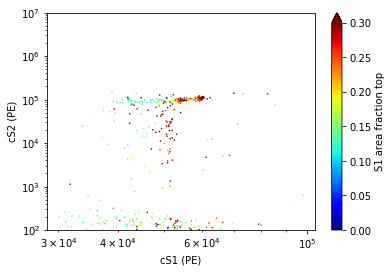

In [112]:
def event_plot(df):
    plt.scatter(df.cs1, df.cs2,
                c=df.s1_area_fraction_top,
                vmin=0, vmax=0.3, 
                s=10,
                cmap=plt.cm.jet,
                marker='.', edgecolors='none')
    plt.colorbar(label="S1 area fraction top", extend='max')
    plt.xlabel('cS1 (PE)')
    plt.ylabel('cS2 (PE)')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e2, 1e7)
    
event_plot(eb)

In [113]:
def plot_elife(data):
    data = data.loc[(5e4<data.cs1)&(5.5e5>data.cs1)]
    data = data.loc[(7.5e4<data.cs2)&(1.3e5>data.cs2)]
    mh = Histdd(data,
               dimensions=[('drift_time', np.linspace(0,7e5,20)),
                         ('cs2',np.linspace(0,1.3e5,20))],
               compute_options=dict(num_workers=4))
    plt.figure(figsize=(10,8))
    mh.plot(log_scale=True,cblabel='Events/bin')
    plt.title('Elife')
    plt.xlabel('drift time (ns)')
    plt.ylabel('cS2 (PE)')
    if Saver: plt.savefig(fig_dir + 'elife.png',bbox_inches='tight')
    plt.show()

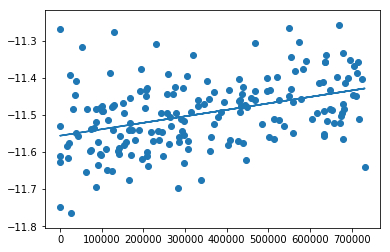

In [132]:
plt.scatter(eb['drift_time'],-np.log(eb['cs2']))
x = eb['drift_time']
y = -np.log(eb['cs2'])
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

In [134]:
np.polyfit(x, y, 1)[0]

1.7402251640389942e-07

In [137]:
np.polyfit(x, y, 1)[0]**-1

5746382.828294698

In [18]:
run_id = '180215_1029'
p = st.get_array(run_id, ['peaks','peak_classification'])

In [72]:
import strax
import numpy as np

@strax.takes_config(
    strax.Option('s1_rise_time_bound', default=70,
                 help='The S1 should rise steeply '),
    strax.Option('s1_width_bound', default=300,
                 help='Peaks starting within this time window (on either side)'
                      'in ns count as nearby.'),
    strax.Option('s1_min_n_channels',default=2),
    strax.Option('s2_min_n_channels',default=4),
    strax.Option('s2_min_area',default=10),
    strax.Option('s2_min_width',default=200)
)
class PaxClassification(strax.Plugin):
    """Set the peak classification to be more or less the same as used in pax"""
    # Name of the data type this plugin provides
    provides = 'peak_classification'
    # Data types this plugin requires. Note we don't specify
    # what plugins should produce them: maybe the default PeakBasics
    # has been replaced by another AdvancedExpertBlabla plugin?
    depends_on = ('peak_basics','peaks')
    
    # Numpy datatype of the output 
    dtype = straxen.plugins.plugins.PeakClassification.dtype
    
    # Version of the plugin. Increment this if you change the algorithm.
    __version__ = '0.0.1'

    def compute(self, peaks):
        p = peaks
        r = np.zeros(len(p), dtype=self.dtype)

        is_s1 = p['n_channels'] >= self.config['s1_min_n_channels']
        is_s1 &= p['width'][:,9] < self.config['s1_width_bound']
        is_s1 &= p['width'][:,1] < self.config['s1_rise_time_bound']
        r['type'][is_s1] = 1

        is_s2 = p['area'] > self.config['s2_min_area']
        is_s2 &= p['n_channels'] >= self.config['s2_min_n_channels']
        is_s2 &= p['range_50p_area'] > self.config['s2_min_width']
        r['type'][is_s2] = 2

        return r

In [73]:
p1 = st.get_array(run_id, ['peak_basics','peak_classification'],
               register=PaxClassification)
p2 = st.get_array(run_id, ['peak_basics','peak_classification'],
               )

In [75]:
print(len(p1[p1['type']==1]),len(p2[p2['type']==1]))
print(len(p1[p1['type']==2]),len(p2[p2['type']==2]))

10934 4598
8682 8901


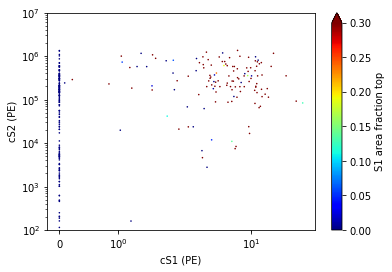

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

def event_plot(df):
    plt.scatter(df.cs1, df.cs2,
                c=df.s1_area_fraction_top,
                vmin=0, vmax=0.3, 
                s=10,
                cmap=plt.cm.jet,
                marker='.', edgecolors='none')
    plt.colorbar(label="S1 area fraction top", extend='max')
    plt.xlabel('cS1 (PE)')
    plt.ylabel('cS2 (PE)')
    plt.xscale('symlog')
    plt.yscale('log')
    plt.ylim(1e2, 1e7)
    
event_plot(df)

294


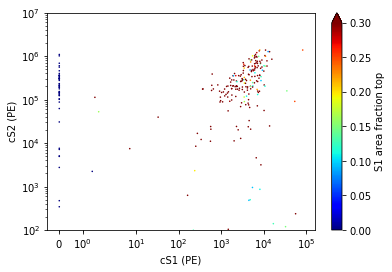

In [54]:
df = st.get_df(run_id, 'event_info')
print(len(df))

event_plot(df)

In [156]:
runs = st.select_runs()
runs = runs[runs['reader.ini.name']=='kr83m_stable']

In [157]:
runs

,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,raw_records_available,peaks_available,records_available,events_available,event_info_available
0,2017-06-07 10:19:51+00:00,kr83m_stable,170607_0919,10265,kr83m_stable,2017-06-07 09:19:48+00:00,"SourceOpening,_sciencerun1_candidate,_sciencerun1",142182.0,True,True,True,True,True


In [210]:
df = st.get_df(runs['name'][0],'event_info')

In [174]:
def event_plot(df):
    plt.scatter(df.cs1, df.cs2,
                c=df.s1_area_fraction_top,
                vmin=0, vmax=1., 
                s=10,
                cmap=plt.cm.jet,
                marker='.', edgecolors='none')
    plt.colorbar(label="S1 area fraction top", extend='max')
    plt.xlabel('cS1 (PE)')
    plt.ylabel('cS2 (PE)')
    plt.xscale('symlog')
    plt.yscale('log')
    plt.ylim(1e2, 1e7)
    

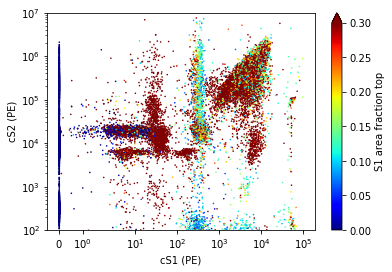

In [166]:
event_plot(df)

Text(0, 0.5, 'S1 Largest other (PE)')

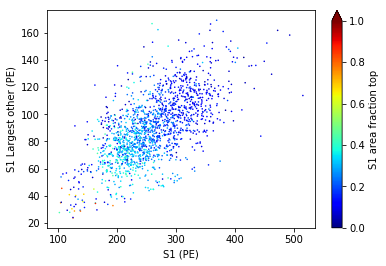

In [211]:
df = df[(df['s1_area']>100)&
        (df['s1_largest_other']>100./600. * df['s1_area'])&
        (df['s1_largest_other']>0)&(df['s1_largest_other']<170)]
plt.scatter(df['s1_area'], df['s1_largest_other'],
            c=df.s1_area_fraction_top,
            vmin=0, vmax=1., 
            s=10,
            cmap=plt.cm.jet,
            marker='.', edgecolors='none')
plt.colorbar(label="S1 area fraction top", extend='max')
plt.xlabel('S1 (PE)')
plt.ylabel('S1 Largest other (PE)')
#plt.xscale('symlog')
#plt.yscale('log')
#plt.ylim(1e2, 1e7)

In [214]:
df['half_life'] = df['drift_time']-df['alt_s1_interaction_drift_time']
# df['half_life'] = df['alt_s1_interaction_drift_time']-df['drift_time']

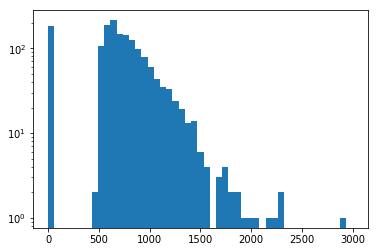

In [217]:
plt.hist(df['half_life'],bins = np.linspace(0,3000,50))
plt.yscale('log')

In [199]:
df[df['half_life']>0]
df['log_half_life']=np.log(df['half_life'])

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


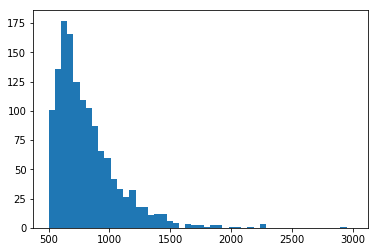

In [200]:
data = plt.hist(df['half_life'],bins = np.linspace(500,3000,50))

In [201]:
data

(array([101., 136., 177., 166., 125., 109., 102.,  87.,  66.,  60.,  42.,
         33.,  26.,  32.,  18.,  18.,  11.,  12.,  12.,   6.,   4.,   0.,
          3.,   2.,   2.,   1.,   2.,   2.,   0.,   1.,   1.,   0.,   1.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.]),
 array([ 500.        ,  551.02040816,  602.04081633,  653.06122449,
         704.08163265,  755.10204082,  806.12244898,  857.14285714,
         908.16326531,  959.18367347, 1010.20408163, 1061.2244898 ,
        1112.24489796, 1163.26530612, 1214.28571429, 1265.30612245,
        1316.32653061, 1367.34693878, 1418.36734694, 1469.3877551 ,
        1520.40816327, 1571.42857143, 1622.44897959, 1673.46938776,
        1724.48979592, 1775.51020408, 1826.53061224, 1877.55102041,
        1928.57142857, 1979.59183673, 2030.6122449 , 2081.63265306,
        2132.65306122, 2183.67346939, 2234.69387755, 2285.71428571,
        2336.73469388, 2387.75510204, 2438.7755102 ,

In [209]:
np.polyfit(data[1][:-1], data[0], 1)[0]**-1

-19.99040460578922

In [205]:
data[1][:-1]

array([ 500.        ,  551.02040816,  602.04081633,  653.06122449,
        704.08163265,  755.10204082,  806.12244898,  857.14285714,
        908.16326531,  959.18367347, 1010.20408163, 1061.2244898 ,
       1112.24489796, 1163.26530612, 1214.28571429, 1265.30612245,
       1316.32653061, 1367.34693878, 1418.36734694, 1469.3877551 ,
       1520.40816327, 1571.42857143, 1622.44897959, 1673.46938776,
       1724.48979592, 1775.51020408, 1826.53061224, 1877.55102041,
       1928.57142857, 1979.59183673, 2030.6122449 , 2081.63265306,
       2132.65306122, 2183.67346939, 2234.69387755, 2285.71428571,
       2336.73469388, 2387.75510204, 2438.7755102 , 2489.79591837,
       2540.81632653, 2591.83673469, 2642.85714286, 2693.87755102,
       2744.89795918, 2795.91836735, 2846.93877551, 2897.95918367,
       2948.97959184])